## Alberi delle decisioni

Inizieremo con una panoramica sul funzionamento dei modelli di apprendimento automatico e sul loro utilizzo. Questo può sembrare elementare se avete già fatto modelli statistici o apprendimento automatico. Non preoccupatevi, presto passeremo alla costruzione di modelli potenti.

Il corso prevede la costruzione di modelli attraverso il seguente scenario:

Vostro cugino ha guadagnato milioni di dollari speculando sul settore immobiliare. Si è offerto di diventare socio d'affari con voi a causa del vostro interesse per la scienza dei dati. Lui fornirà i soldi e voi fornirete i modelli per prevedere il valore delle varie case.

Chiedete a vostro cugino come ha fatto a prevedere il valore degli immobili in passato e lui vi risponde che si tratta solo di intuizione. Ma più domande rivelano che ha identificato i modelli di prezzo delle case che ha visto in passato e li usa per fare previsioni sulle nuove case che sta considerando.

L'apprendimento automatico funziona allo stesso modo. Inizieremo con un modello chiamato **albero delle decisioni**. Esistono modelli più sofisticati che forniscono previsioni più accurate. Ma gli alberi decisionali sono facili da capire e sono la base per alcuni dei migliori modelli della scienza dei dati.

Per semplicità, inizieremo con **l'albero decisionale** più semplice possibile.

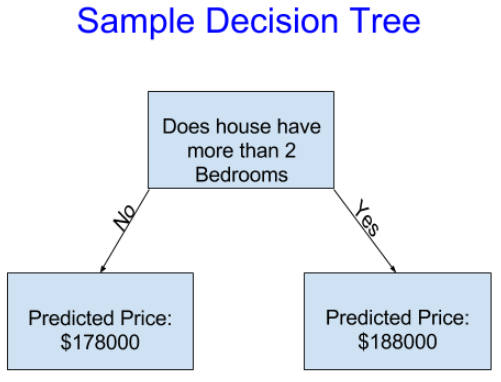

Divide le case in due sole categorie. Il prezzo previsto per ogni casa in esame è il prezzo medio storico delle case della stessa categoria.

Utilizziamo i dati per decidere come suddividere le case in due gruppi e poi per determinare il prezzo previsto per ciascun gruppo. Questa fase di cattura dei modelli dai dati si chiama adattamento o addestramento del modello. I dati utilizzati per adattare il modello sono chiamati dati di addestramento.

I dettagli relativi all'adattamento del modello (ad esempio, come suddividere i dati) sono abbastanza complessi da essere trattati in un secondo momento. Dopo che il modello è stato adattato, è possibile applicarlo a nuovi dati per prevedere i prezzi di altre case.

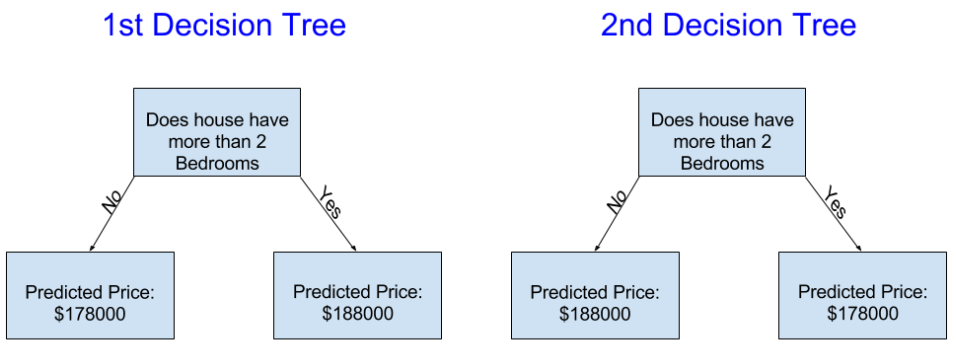

L'albero decisionale a sinistra (1st Decision Tree) ha probabilmente più senso, perché coglie la realtà che le case con più camere da letto tendono a essere vendute a prezzi più alti rispetto a quelle con meno camere da letto. Il più grande difetto di questo modello è che non coglie la maggior parte dei fattori che influenzano il prezzo delle case, come il numero di bagni, le dimensioni del lotto, la posizione, ecc.

È possibile catturare un maggior numero di fattori utilizzando un albero con più "spaccature". Questi alberi sono detti "più profondi". Un albero decisionale che consideri anche la dimensione totale del lotto di ogni casa potrebbe avere questo aspetto:

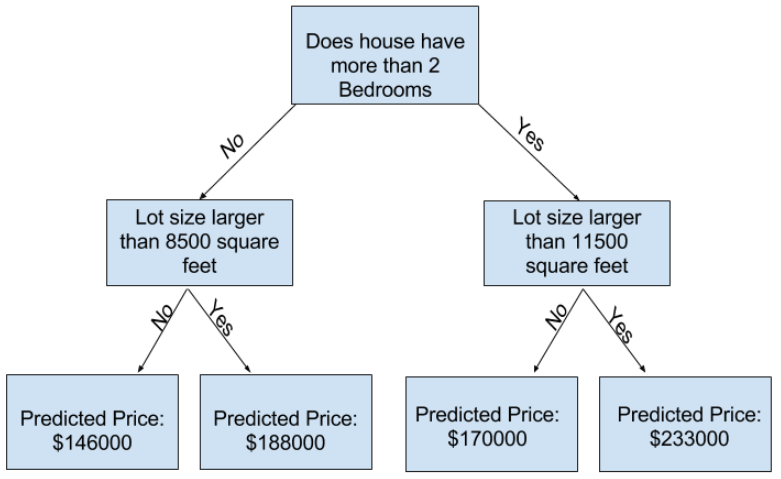

Si prevede il prezzo di una qualsiasi casa percorrendo l'albero decisionale, scegliendo sempre il percorso corrispondente alle caratteristiche della casa. Il prezzo previsto per la casa si trova in fondo all'albero. Il punto in basso in cui facciamo una previsione è chiamato foglia.

Le suddivisioni e i valori delle foglie saranno determinati dai dati, quindi è il momento di verificare i dati con cui si lavorerà.

## Dati

Il primo passo in qualsiasi progetto di apprendimento automatico è quello di familiarizzare con i dati. A tale scopo si utilizzerà la libreria **Pandas**. Pandas è lo strumento principale utilizzato dagli scienziati dei dati per esplorare e manipolare i dati. La maggior parte delle persone abbrevia pandas nel proprio codice come pd. Lo facciamo con il comando

In [1]:
import pandas as pd

La parte più importante della libreria Pandas è il **DataFrame**. DataFrame contiene il tipo di dati che si potrebbe considerare una tabella. È simile a un foglio di Excel o a una tabella di un database SQL.

Pandas dispone di metodi potenti per la maggior parte delle operazioni che si desidera eseguire con questo tipo di dati.

A titolo di esempio, esamineremo i dati relativi ai prezzi delle case a Melbourne, in Australia. Negli esercizi pratici, applicherete gli stessi processi a un nuovo set di dati, che contiene i prezzi delle case in Iowa.

I dati di esempio (Melbourne) si trovano nel percorso file ../input/melbourne-housing-snapshot/melb_data.csv.

Carichiamo ed esploriamo i dati con i seguenti comandi:

In [2]:
# save filepath to variable for easier access
melbourne_file_path = 'D:/Users/Alessio//OneDrive/Python/Kaggle/Intro to Machine Learning/melb_data.csv'
# read the data and store data in DataFrame titled melbourne_data
melbourne_data = pd.read_csv(melbourne_file_path) 
# print a summary of the data in Melbourne data
melbourne_data.describe() # simile a .head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


I risultati mostrano 8 numeri per ogni colonna del dataset originale. Il primo numero, il conteggio, mostra quante righe hanno valori non mancanti.

I valori mancanti sono dovuti a molte ragioni. Ad esempio, le dimensioni della seconda camera da letto non vengono rilevate quando si effettua un'indagine su una casa con una sola camera da letto. Torneremo sull'argomento dei dati mancanti.

Il secondo valore è la media, ovvero la media. Sotto di esso, std è la deviazione standard, che misura la dispersione numerica dei valori.

Per interpretare i valori minimo, 25%, 50%, 75% e massimo, immaginate di ordinare ogni colonna dal valore più basso a quello più alto. Il primo valore (il più piccolo) è il minimo. Se si percorre un quarto dell'elenco, si troverà un numero che è più grande del 25% dei valori e più piccolo del 75% dei valori. Questo è il valore del 25% (pronunciato "25° percentile"). Il 50° e il 75° percentile sono definiti in modo analogo e il massimo è il numero più grande.

## Esercizi

Questo esercizio mette alla prova la capacità di leggere un file di dati e di comprenderne le statistiche.

Negli esercizi successivi, si applicheranno tecniche per filtrare i dati, costruire un modello di apprendimento automatico e migliorare iterativamente il modello.

Gli esempi del corso utilizzano i dati di Melbourne. Per essere sicuri di poter applicare queste tecniche da soli, dovrete applicarle a un nuovo set di dati (con i prezzi delle case dell'Iowa).

Gli esercizi utilizzano un ambiente di codifica "notebook". Nel caso in cui non abbiate familiarità con i notebook, abbiamo un video introduttivo di 90 secondi.

In [3]:
# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex2 import *
print("Setup Complete")

Setup Complete


### Domanda 1

Leggere il file di dati Iowa in un DataFrame di Pandas chiamato home_data.

In [4]:
import pandas as pd

# Path of the file to read
iowa_file_path = 'D:/Users/Alessio//OneDrive/Python/Kaggle/Intro to Machine Learning/train.csv'

# Fill in the line below to read the file into a variable home_data
home_data = pd.read_csv(iowa_file_path)

# Call line below with no argument to check that you've loaded the data correctly
step_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

### Domanda 2
Utilizzate il comando **describe()** che avete imparato per visualizzare le statistiche di riepilogo dei dati. Quindi inserire le variabili per rispondere alle seguenti domande

In [5]:
home_data.describe() 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [16]:
# What is the average lot size (rounded to nearest integer)?
import numpy as np
avg_lot_size = round(np.mean(home_data.loc[:, 'LotArea']))
# Si può anche vedere diretto il valore in tabella

# As of today, how old is the newest home (current year - the date in which it was built)
newest_home_age = 2022 - max(home_data.loc[:, 'YearBuilt'])
# Si può anche vedere diretto il valore in tabella e sottrarlo ad oggi

# Checks your answers
step_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>